In [3]:
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import gca

from matplotlib.pyplot import figure, savefig, show, subplots
from dslabs_functions import plot_bar_chart, get_variable_types, set_chart_labels, define_grid, HEIGHT, plot_multi_scatters_chart
from seaborn import heatmap
from numpy import array, ndarray
from matplotlib.figure import Figure

file_tag = "final_model_results2"

import matplotlib.pyplot as plt
import numpy as np

#models = ("gpt3.5-finetuned-small", "gpt3.5-finetuned", "gpt3.5-zeroshot","mistral-finetuned","mistral-zeroshot")
results = {
    'BLEU': [],
    'METEOR': [],
    'ROUGE': [],
}
dic = {}
import os
directory = "/home/eduvedras/tese/model/results-final/"
for file in os.scandir(directory):
    if file.is_file():
        if "txt" in file.name:
            f = open(file.path, "r")
            line = f.readline()
            bleu = line.split(": ")[2]
            bleu = bleu.split(",")[0]
            line = f.readline()
            meteor = line.split(": ")[2]
            meteor = meteor.split("}")[0]
            line = f.readline()
            rouge = line.split("Lsum': ")[1]
            rouge = rouge.split("}")[0]
            dic[file.name[:-4]] = {'BLEU': float(bleu), 'METEOR': float(meteor), 'ROUGE': float(rouge)}


{'BLEU': [0.08, 0.32, 0.85, 0.06], 'METEOR': [0.31, 0.52, 0.89, 0.27], 'ROUGE': [0.27, 0.49, 0.89, 0.27]}


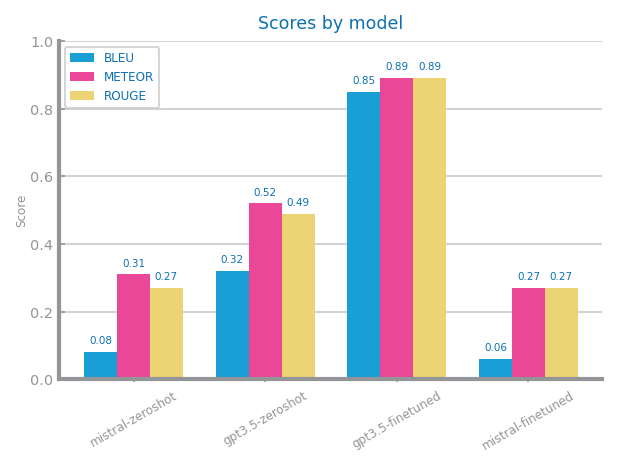

In [4]:
models = []   
for key in dic:
    models.append(key)
    results['BLEU'].append(round(dic[key]['BLEU'],2))
    results['METEOR'].append(round(dic[key]['METEOR'],2))
    results['ROUGE'].append(round(dic[key]['ROUGE'],2))
print(results)


x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3,fontsize=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores by model')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=1,fontsize='xx-small')
ax.set_ylim(0, 1)
ax.tick_params(axis="x", labelrotation=30, labelsize="xx-small")


savefig(f"thesisplots/{file_tag}.png", bbox_inches='tight')
show()